In [1]:
import os
import winsound

import librosa
import librosa.display
import IPython.display

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# path 정보 확인
print(os.getcwd())

target_path = "d:\GH\Audio\dataset\소리인식\분류완료\Drager evita V300"
print(target_path)

d:\GH\Audio\DSP
d:\GH\Audio\dataset\소리인식\분류완료\Drager evita V300


In [3]:
filename = os.path.join(target_path, 'V300 high priority alarm 30.wav')
y, sr = librosa.load(filename, sr=44100)

print(y, sr)

[0.02407837 0.01737976 0.01255798 ... 0.         0.         0.        ] 44100


In [4]:
def non_zero(data):
    idx = np.where(data != 0)[0]
    my_wants = idx[-1]
    return data[:(my_wants+1)]

In [5]:
None_zero_y = non_zero(y)
print(None_zero_y[-1])
print(None_zero_y.shape)

-0.017028809
(147746,)


In [76]:
# print(type(y))
# print(np.where(y != 0))
# print(y.shape)

# None_zero_y = y[:145857]
# print(None_zero_y[-1])
# print(None_zero_y.shape)

<class 'numpy.ndarray'>
(array([     0,      1,      2, ..., 147743, 147744, 147745], dtype=int64),)
(191846,)
-0.00015258789
(145857,)


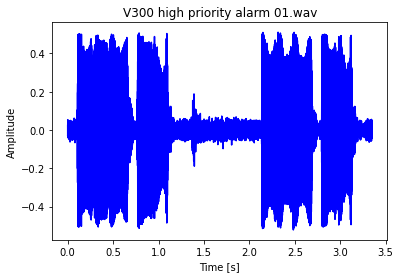

In [6]:
time = np.linspace(0, len(None_zero_y)/sr, len(None_zero_y)) # time axis

fig, ax1 = plt.subplots() # plot
ax1.plot(time, None_zero_y, color = 'b', label='speech waveform')
ax1.set_ylabel("Amplitude") # y 축
ax1.set_xlabel("Time [s]") # x 축
plt.title('V300 high priority alarm 01.wav') # 제목
plt.show()

In [59]:
winsound.PlaySound(filename, winsound.SND_FILENAME)

(513, 289) 289 (0.104443856+0j)


C:\Users\angel\anaconda3\envs\tf_dl\lib\site-packages\librosa\util\decorators.py:88: UserWarning: power_to_db was called on complex input so phase information will be discarded. To suppress this warning, call power_to_db(np.abs(D)**2) instead.
  return f(*args, **kwargs)


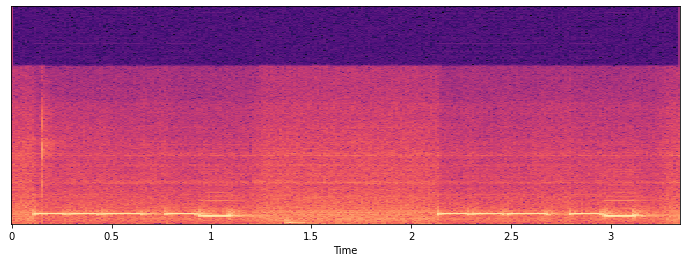

In [7]:
S = librosa.core.stft(None_zero_y, n_fft=1024, hop_length=512, win_length=1024)
print(S.shape, len(S[0]), S[0][0])

D = np.abs(S)**2
log_S = librosa.power_to_db(S, ref=np.max) #소리의 단위를 db로 바꿈 

plt.figure(figsize=(12,4))
librosa.display.specshow(log_S, sr=44100, x_axis='time')

(128, 289) 289 0.035960983
<class 'numpy.ndarray'>


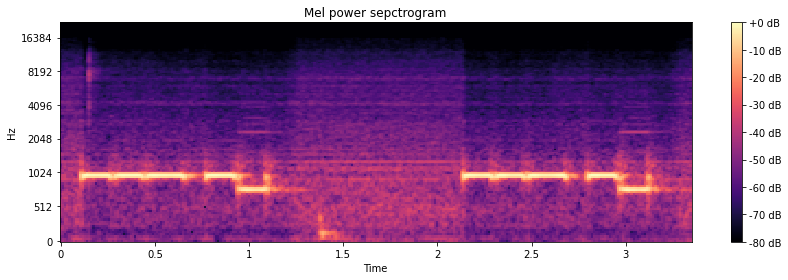

In [10]:
S = librosa.feature.melspectrogram(y=None_zero_y, sr=sr, n_mels = 128)
print(S.shape, len(S[0]), S[0][0])

log_S = librosa.power_to_db(S, ref=np.max)
plt.figure(figsize=(12,4))
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
plt.title('Mel power sepctrogram')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

print(type(log_S))

(13, 289)
<class 'numpy.ndarray'>


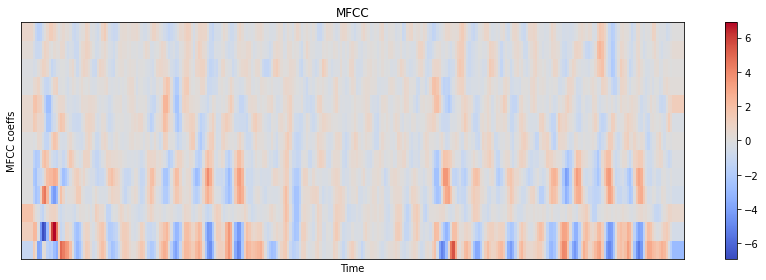

In [11]:
mfcc = librosa.feature.mfcc(S=log_S, n_mfcc=13)
delta2_mfcc = librosa.feature.delta(mfcc, order=2)
print(delta2_mfcc.shape)

plt.figure(figsize=(12,4))
librosa.display.specshow(delta2_mfcc)
plt.ylabel('MFCC coeffs')
plt.xlabel('Time')
plt.title('MFCC')
plt.colorbar()
plt.tight_layout()

print(type(delta2_mfcc))